# NATS3200: Practical (Random forests and Neural Networks, weeks 8, 9) 

### Can I eat that mushroom?

classic machine learning data set? When researchers create new methods they typically test their performance
on data sets people have looked at before, so that the prediction accuracy can be benchmarked against
existing methods. This means that certain data sets appear time and time again in research. One of these is
the famous ‘mushroom data set’: a set of observations about different specimens of gilled mushrooms in The
Audubon Society Field Guide to North American Mushrooms (1981). Each specimen is measured in terms of
some visual and olfactory information, such as its Cap Size and its Odor type. They are also labelled as
being edible or poisonous. Our goal is to determine whether a mushroom is edible from its characteristics.

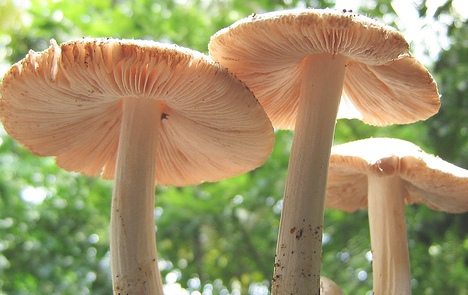
Figure 1: An example of gilled mushrooms. A classic machine learning task is to determine whether or not a
particular mushroom is poisonous based on its visual and olfactory characteristics

Download the data from MINERVA: mushrooms.csv

There are 6 attributes in the data, all of which are factors (non-numeric categorical variables). These are:
Edible (to be predicted), CapShape, CapSurface, CapColor, Odor and Height. 

Tasks (week 8):

1. Fit Random Forest models using each possible input on its own to predict edibility. Evaluate the
quality of fit by using the predict function to calculate the predicted class for each mushroom (edible
or poisonous). Which input fits best? (i.e. which classifies the most
mushrooms correctly?) (0.5 marks)
2. Using cross-validation, perform a model selection to determine which features are useful for making
predictions using a Random Forest. As above, use the number of mushrooms correctly classified as the
criterion for deciding which model is best. You might try to find a way to loop over all 32 possible
models. Or select features ‘greedily’, by picking one at a
time to add to the model. Present your results in the most convincing way you can. (2 marks)

3. Would you use this classifier if you were foraging for mushrooms? Discuss with reference to factors that
you identified as important and the probability of poisoning yourself. (0.5 marks)

Tasks (week 9):

4. Fit an ANN model using each possible input on its own to predict edibility.
Evaluate the
quality of fit by using the predict function to calculate the predicted class for each mushroom (edible
or poisonous). Which input fits best? (i.e. which classifies the most
mushrooms correctly?) (0.5 marks)

5. Using cross-validation, perform a model selection to determine which features are useful for making
predictions using the ANN. As above, use the number of mushrooms correctly classified as the
criterion for deciding which model is best. You might try to find a way to loop over all 32 possible
models. Or select features ‘greedily’, by picking one at a
time to add to the model. Present your results in the most convincing way you can. (2 marks)

6. Take the best model and explore how the performance depends on the architecture of the ANN.
Vary the number and the sizes of the hidden layers. For large networks you may want to increase the number of the stochastic gradient descent iterations. (1 mark)

7. Compare the performance of Random Forest and ANN models.
For example, which data types, do you think, the two ML models are most suited to describe.  (0.5 marks)

8. Quality of presentation of report in Jupyter notebook (2 mark)

9. Bonus point: Justify why your work/report goes beyond just completing the tasks and deserves an extra mark (1 mark) 

**Submission of work:** 
-	The work must be submitted as an ipynb on minerva
-	The filename must be Surname-problem8and9.ipynb
-	The self-assessment must be added at the end of the ipynb. Mark each task above.
-	Declaration of integrity (That the work you submitted is yours, and that you marked it fairly)

**Deadline:** 29th Apr 2025, 5pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Fit Random Forest models using each possible input on its own to predict edibility. Evaluate the
quality of fit by using the predict function to calculate the predicted class for each mushroom (edible
or poisonous). Which input fits best? (i.e. which classifies the most
mushrooms correctly?) (0.5 marks)**

In [4]:
df = pd.read_csv('mushrooms.csv')
df

,Edible,CapShape,CapSurface,CapColor,Odor,Height
0,Poisonous,Convex,Smooth,Brown,Pungent,Tall
1,Edible,Convex,Smooth,Yellow,Almond,Short
2,Edible,Bell,Smooth,White,Anise,Tall
3,Poisonous,Convex,Scaly,White,Pungent,Short
4,Edible,Convex,Smooth,Gray,NaN,Short
...,...,...,...,...,...,...
8119,Edible,Knobbed,Smooth,Brown,NaN,Tall
8120,Edible,Convex,Smooth,Brown,NaN,Tall
8121,Edible,Flat,Smooth,Brown,NaN,Short
8122,Poisonous,Knobbed,Scaly,Brown,Fishy,Short


In [6]:
# label encoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df

,Edible,CapShape,CapSurface,CapColor,Odor,Height
0,1,2,3,0,6,1
1,0,2,3,9,0,0
2,0,0,3,8,1,1
3,1,2,2,8,6,0
4,0,2,3,3,8,0
...,...,...,...,...,...,...
8119,0,4,3,0,8,1
8120,0,2,3,0,8,1
8121,0,3,3,0,8,0
8122,1,4,2,0,3,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
selected_feature = 'Odor'
x = df[[selected_feature]]
y = df['Edible']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


myforest = RandomForestClassifier(n_estimators=100)
myforest.fit(x_train,y_train)

prediction = myforest.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy for {selected_feature}: {accuracy:.2f}")

Accuracy for Odor: 0.99


In [17]:
# List of features to test
features = ["CapShape", "CapSurface", "CapColor", "Odor", "Height"]
y = df["Edible"]
accuracies = {}

# Loop through each feature
for feature in features:
    x = df[[feature]]  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # Train the Random Forest model
    myforest = RandomForestClassifier(n_estimators=100)
    myforest.fit(x_train, y_train)
    prediction = myforest.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    accuracies[feature] = accuracy
    print(f"Accuracy for {feature}: {accuracy:.2f}")

best_feature = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_feature]

# Print the best feature and its accuracy
print(f"\nFeature with highest accuracy: {best_feature} with accuracy: {best_accuracy:.2f}")

Accuracy for CapShape: 0.57
Accuracy for CapSurface: 0.58
Accuracy for CapColor: 0.59
Accuracy for Odor: 0.98
Accuracy for Height: 0.51

Feature with highest accuracy: Odor with accuracy: 0.98


**2. Using cross-validation, perform a model selection to determine which features are useful for making
predictions using a Random Forest. As above, use the number of mushrooms correctly classified as the
criterion for deciding which model is best. You might try to find a way to loop over all 32 possible
models. Or select features ‘greedily’, by picking one at a
time to add to the model. Present your results in the most convincing way you can. (2 marks)**

### Justification for Using Greedy Feature Selection Over Testing All Feature Combinations:

Greedy feature selection is a practical and computationally efficient approach compared to testing all possible feature combinations, especially when dealing with a large dataset.

1. **Computational Efficiency**:  
   - Testing all 32 combinations (for 5 features) requires training multiple models, which is time-consuming and computationally expensive. Greedy selection reduces this by iteratively adding one feature at a time, speeding up the prouations.

3. **Practical Application**:  
   - Greedy selection is fast and effective in identifying key features without overfitting. It provides a good balance between performance and computational resources, making it suitable for real-world problems where quick results are needed.

4. **Effectiveness**:  
   - While it may not always find the absolute best feature set (as exhaustive search would), greedy selection typically yields a high-performing feature subset, especially in cases with redundant or irrelevant features.

#### Conclusion:
Greedy selection is justified because it is faster, more scalable, and well-suited for large datasets. It provides a practical way to identify the most important features without the computational cost of testing all combinations.


In [17]:
features = ["CapShape"], ["CapSurface"], ["CapColor"], ["Odor"], ["Height"],


Frequency of each feature set winning across repetitions:
CapShape: 0 wins
CapSurface: 0 wins
CapColor: 0 wins
Odor: 100 wins
Height: 0 wins


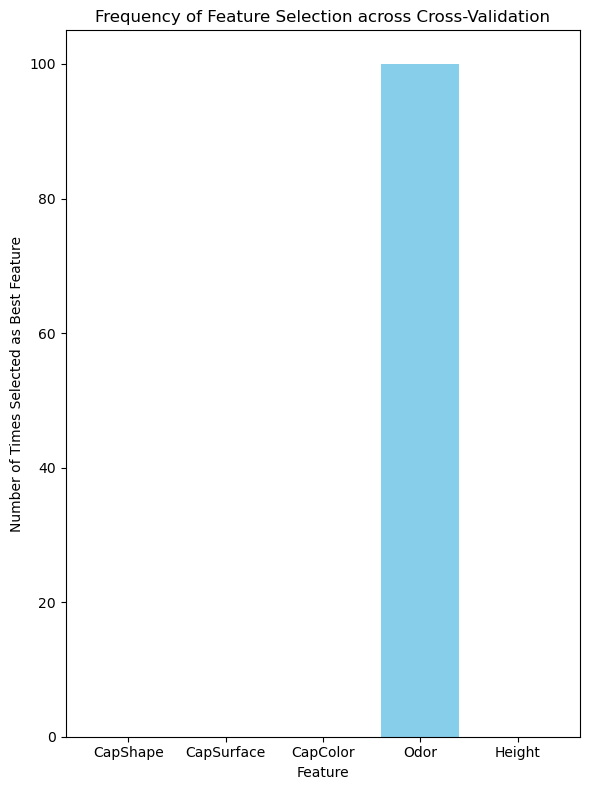


Overall best feature: Odor with 100 wins


In [18]:
# List of features to test
features = ["CapShape", "CapSurface", "CapColor", "Odor", "Height"]
y = df["Edible"]
rep = 100
winner = []

# Dictionary to store log-likelihood values
for i in range(rep):
    accuracies = {}
    # Loop through each feature
    for feature in features:
        x = df[[feature]]  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        myforest = RandomForestClassifier(n_estimators=100)
        myforest.fit(x_train, y_train)
        prediction = myforest.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[feature] = accuracy
    
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)

feature_counts = {str(feature): winner.count(str(feature)) for feature in features}

# Print the results at the end
print("\nFrequency of each feature set winning across repetitions:")
for feature, count in feature_counts.items():
    print(f"{feature}: {count} wins")
feature_labels = [' & '.join(feature) for feature in features]

feature_counts = [winner.count(str(feature)) for feature in features]

plt.figure(figsize=(6, 8))
plt.bar(features, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")


In [19]:
# List of feature sets to test
features = [
    ['Odor'],
    ['Odor', 'CapShape'],
    ['Odor', 'CapSurface'],
    ['Odor', 'CapColor'],
    ['Odor', 'Height']
]

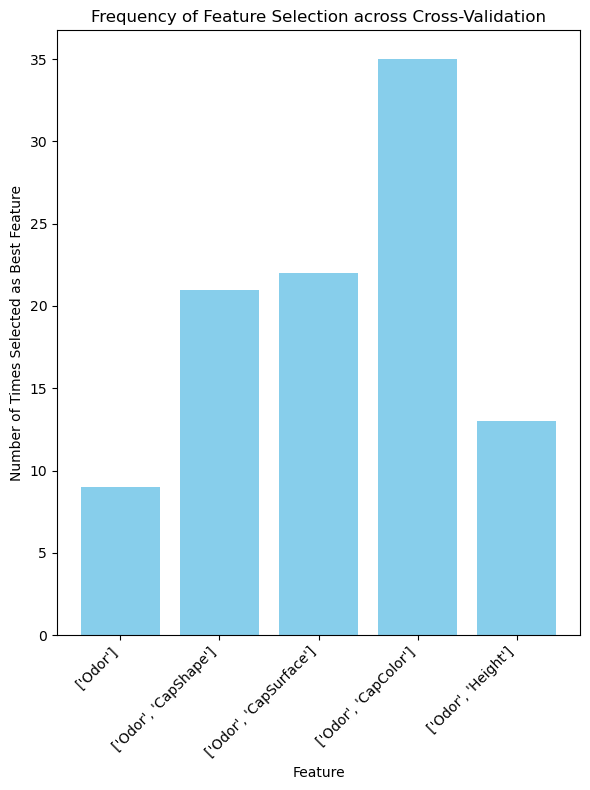


Overall best feature: ['Odor', 'CapColor'] with 35 wins


In [20]:
y = df["Edible"]
rep = 100  # Number of repetitions
winner = []

# Loop over repetitions
# Dictionary to store log-likelihood values
for i in range(rep):
    accuracies = {}
    # Loop through each feature
    for feature in features:
        x = df[feature]  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        myforest = RandomForestClassifier(n_estimators=100)
        myforest.fit(x_train, y_train)
        prediction = myforest.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy 
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features] 

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")


In [21]:
features = [['Odor'],
    ['Odor', 'CapColor'],  # Include both 'Odor' and 'CapColor'
    ['Odor', 'CapColor', 'CapShape'],
    ['Odor', 'CapColor', 'CapSurface'],
    ['Odor', 'CapColor', 'Height']
]

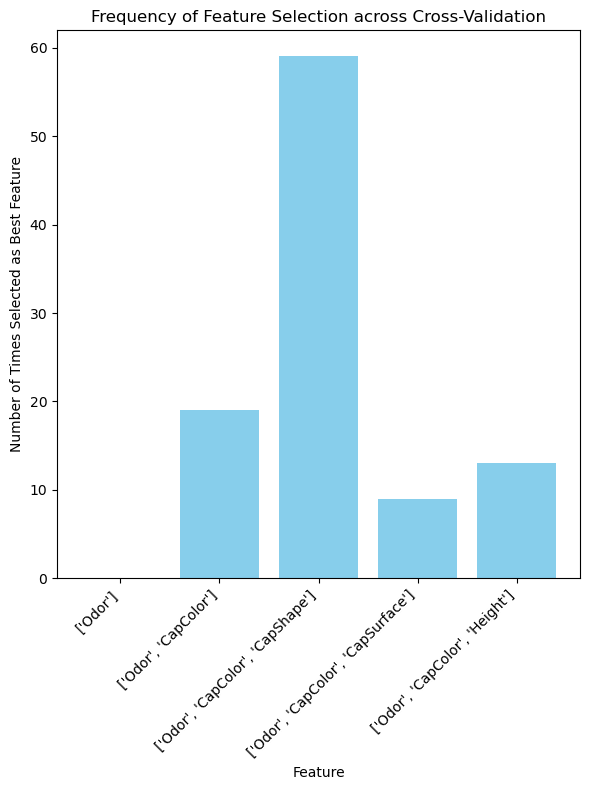


Overall best feature: ['Odor', 'CapColor', 'CapShape'] with 59 wins


In [22]:
y = df["Edible"]
rep = 100  # Number of repetitions
winner = []

# Loop over repetitions
# Dictionary to store log-likelihood values
for i in range(rep):
    accuracies = {}
    # Loop through each feature
    for feature in features:
        x = df[feature]  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        myforest = RandomForestClassifier(n_estimators=100)
        myforest.fit(x_train, y_train)
        prediction = myforest.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy 
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features] 

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")


In [23]:
features = [['Odor'],
    ['Odor', 'CapColor'],
    ['Odor', 'CapColor', 'CapShape'],  # Keep the winning combination
    ['Odor', 'CapColor', 'CapShape', 'CapSurface'],
    ['Odor', 'CapColor', 'CapShape', 'Height'],['Odor', 'CapColor', 'CapShape', 'Height','CapSurface']
]

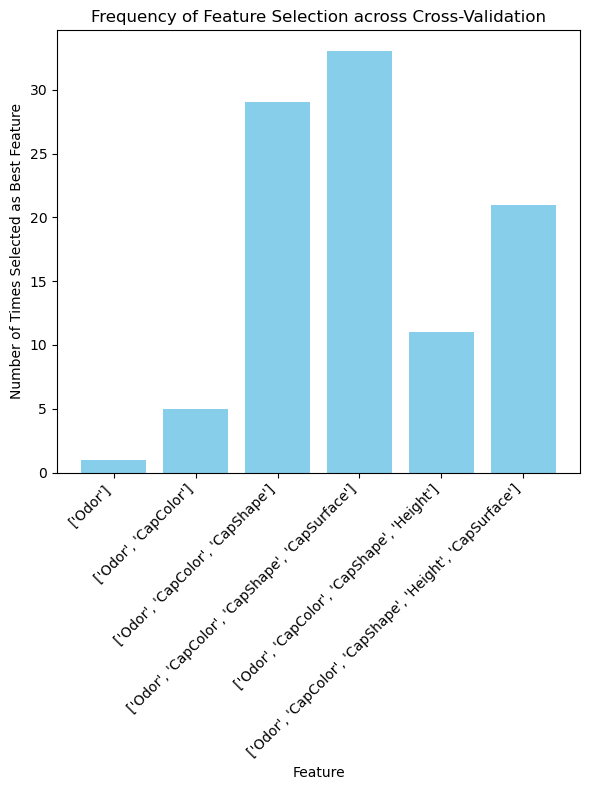


Overall best feature: ['Odor', 'CapColor', 'CapShape', 'CapSurface'] with 33 wins


In [24]:
y = df["Edible"]
rep = 100  # Number of repetitions
winner = []

# Loop over repetitions
# Dictionary to store log-likelihood values
for i in range(rep):
    accuracies = {}
    # Loop through each feature
    for feature in features:
        x = df[feature]  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        myforest = RandomForestClassifier(n_estimators=100)
        myforest.fit(x_train, y_train)
        prediction = myforest.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy 
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features] 

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")


# Justification for Using a Bar Chart to Present Cross-Validation Wins

A bar chart is the most effective way to present the number of times each model wins in cross-validation due to its clarity and simplicity. Since each model corresponds to a unique feature subset, a bar chart clearly shows the frequency of wins for each model, making it easy to compare their performance at a glance. This type of chart works well with categorical data like feature subsets because it allows for quick and intuitive comparisons between models.

In addition, the bar chart allows the top-performing model to be highlighted easily. This makes it a better option than other chart types, such as line charts, which assume continuity between categories, or heatmaps, which are better suited for showing feature importance rather than the number of wins for different models.

Ultimately, a bar chart is a straightforward and effective tool for presenting the results of cross-validation, allowing for clear visual communication of which model performed the best across multiple repetitions.


# Mushroom Edibility Feature Selection Analysis

The greedy feature selection results highlight the progressive importance of different features in predicting mushroom edibility.  

- **Round 1:** Odor was tested individually and emerged as the strongest single predictor, winning all 100 repetitions.  
- **Round 2:** When Odor and Cap Color were tested together, they outperformed Odor alone, winning 35 times, suggesting that Cap Color provides valuable additional information.  
- **Round 3:** Adding Cap Shape further improved performance, leading to 59 wins, indicating its strong contribution.  
- **Round 4:** The combination of Odor, Cap Color, Cap Shape, and Cap Surface remained the best feature set, winning 33 times.  

Interestingly, when all features were considered together, this combination did not win as often. This suggests that adding too many features may introduce noise or reduce model efficiency. This pattern confirms that while Odor is the most dominant feature, incorporating Cap Color, Cap Shape, and Cap Surface progressively strengthens classification—up to a point.


**3. Would you use this classifier if you were foraging for mushrooms? Discuss with reference to factors that
you identified as important and the probability of poisoning yourself. (0.5 marks)**

If I were foraging for mushrooms, I would be cautious about using this classifier for several reasons, particularly in terms of the factors identified and the potential risks associated with the probability of poisoning.

### 1. **Subjectivity of Odor**:
   - **Odor as the Key Factor**: Odor is one of the most important factors identified, but it's highly subjective. The classifier relies on a feature such as "odor," which is subjective and can vary based on personal perception. One person might interpret a certain odor as harmless, while another might find it 'pungent' or associated with something toxic. This could lead to inconsistencies in classification.
   - **No Universal Agreement**: Since there’s no way to definitively describe a mushroom’s odor (other than providing a general description), there’s no universal agreement on what constitutes a "safe" or "toxic" odor. For instance, some mushrooms might have odors that are pleasant to some people but hazardous to others.

### 2. **The Issue with External Factors**:
   - **Environmental Changes**: The odor of a mushroom can also change depending on external factors, such as the environment in which it grows. If the mushroom is exposed to sunlight, humidity, or temperature fluctuations, its odor might alter. This means that the classifier, which might rely heavily on a specific set of features (like "odor"), might not generalize well across different conditions. Foraging in different climates or seasons could result in misleading results if the model hasn’t accounted for those variations.

### 3. **The Probability of Poisoning**:
   - **Risk of Poisoning**: While the classifier may help differentiate between edible and toxic mushrooms based on the features, the probability of poisoning cannot be entirely eliminated. The model provides probabilistic predictions (e.g., it might predict a mushroom is 80% likely to be edible based on the features), but these predictions don’t guarantee safety. In mushroom foraging, even small mistakes can have fatal consequences, as some mushrooms look very similar to edible ones but are highly poisonous.
   - **Error Margin and Uncertainty**: There is always an inherent error margin in the predictions of any classifier, especially with highly complex and nuanced factors such as smell, appearance, and environmental context. Even a "high confidence" prediction (e.g., 90% likelihood) could still be wrong, leading to potential poisoning. Given that the classifier is only as good as the data used to train it, if there are nuances or missing features (e.g., the presence of toxins not reflected in the model), the risk of poisoning increases.

### 4. **Conclusion**:
   While the classifier could potentially help in the decision-making process, I would be hesitant to rely solely on it for mushroom foraging. The subjective nature of odor, the potential for environmental factors to affect the classifier’s accuracy, and the inevitable uncertainty of predicting a mushroom's edibility mean that there's a significant probability of poisoning despite the model's predictions. It would be safer to use a combination of expert knowledge, visual identification, and a classifier, rather than depending on the model alone.


**4. Fit an ANN model using each possible input on its own to predict edibility.
Evaluate the
quality of fit by using the predict function to calculate the predicted class for each mushroom (edible
or poisonous). Which input fits best? (i.e. which classifies the most
mushrooms correctly?) (0.5 marks)**

In [10]:
from sklearn.neural_network import MLPClassifier

Accuracy for CapShape: 0.57
Accuracy for CapSurface: 0.59
Accuracy for CapColor: 0.55
Accuracy for Odor: 0.98
Accuracy for Height: 0.51

Feature with highest accuracy: Odor with accuracy: 0.98


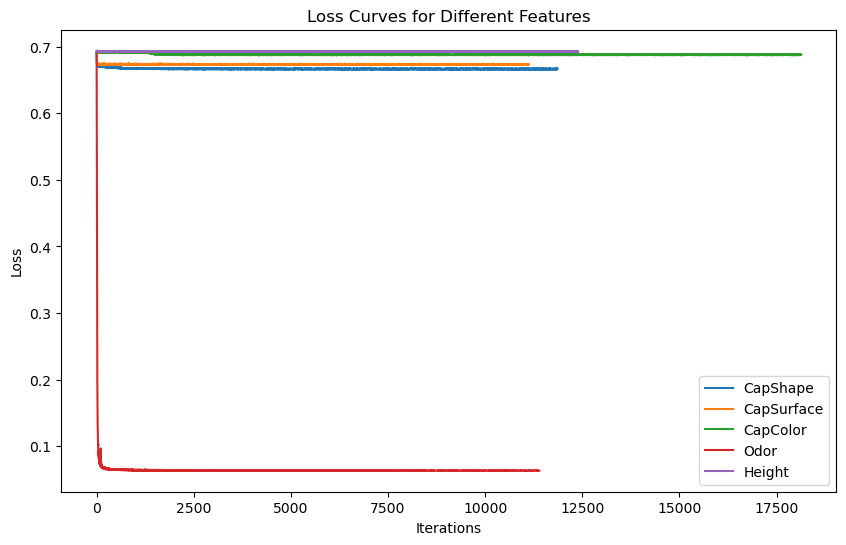

In [16]:
features = ["CapShape", "CapSurface", "CapColor", "Odor", "Height"]
y = df["Edible"]
accuracies = {}
loss_curves = {}

# Loop through each feature
for feature in features:
    x = df[[feature]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = MLPClassifier(solver='sgd',learning_rate_init=0.1,hidden_layer_sizes=(2,),max_iter=20000,activation='logistic',n_iter_no_change=10000)
    model.fit(x_train,y_train.values.ravel())
    prediction = model.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    accuracies[feature] = accuracy
    print(f"Accuracy for {feature}: {accuracy:.2f}")
    loss_curves[feature] = model.loss_curve_

best_feature = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_feature]

# Print the best feature and its accuracy
print(f"\nFeature with highest accuracy: {best_feature} with accuracy: {best_accuracy:.2f}")
plt.figure(figsize=(10, 6))
for feature, loss_curve in loss_curves.items():
    plt.plot(loss_curve,label=feature)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curves for Different Features')
plt.legend()
plt.show()

**5. Using cross-validation, perform a model selection to determine which features are useful for making
predictions using the ANN. As above, use the number of mushrooms correctly classified as the
criterion for deciding which model is best. You might try to find a way to loop over all 32 possible
models. Or select features ‘greedily’, by picking one at a
time to add to the model. Present your results in the most convincing way you can. (2 marks)**

In [19]:
features = ["CapShape", "CapSurface", "CapColor", "Odor", "Height"]

rep 0
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 1
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 2
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 3
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 4
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 5
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 6
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Height
rep 7
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 8
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 9
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 10
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 11
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 12
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 13
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Height
rep 14
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 15
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 16
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 17
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 18
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 19
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 20
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 21
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 22
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 23
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 24
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 25
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 26
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 27
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 28
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 29
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 30
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 31
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Height
rep 32
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 33
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 34
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 35
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 36
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 37
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 38
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 39
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 40
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 41
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 42
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 43
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 44
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 45
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 46
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 47
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 48
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 49
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 50
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 51
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 52
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 53
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 54
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 55
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 56
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 57
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 58
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 59
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 60
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 61
feature = CapShape
feature = CapSurface


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapColor
feature = Odor
feature = Height
rep 62
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 63
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 64
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 65
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 66
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 67
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 68
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 69
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 70
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 71
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 72
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 73
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 74
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 75
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 76
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 77
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapColor
feature = Odor
feature = Height
rep 78
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 79
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 80
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 81
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 82
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 83
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Height
rep 84
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 85
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 86
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 87
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 88
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 89
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 90
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 91
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 92
feature = CapShape
feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 93
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 94
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 95
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 96
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 97
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height
rep 98
feature = CapShape


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = CapSurface
feature = CapColor
feature = Odor
feature = Height
rep 99
feature = CapShape
feature = CapSurface
feature = CapColor


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = Odor
feature = Height


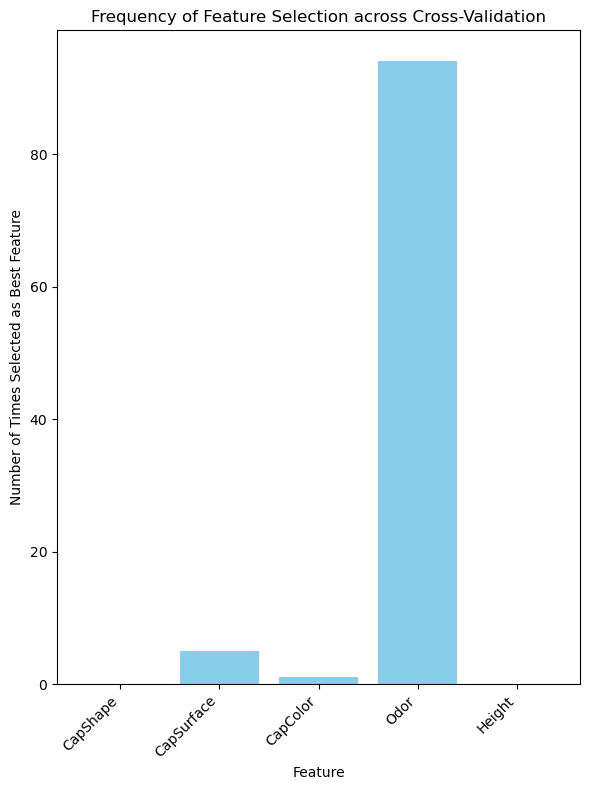


Overall best feature: Odor with 94 wins


In [16]:
y = df["Edible"]
rep = 100 
winner = []


for i in range(rep):
    accuracies = {}
    print(f"rep {i}")
    # Loop through each feature
    for feature in features:
        print(f"feature = {feature}")
        x = df[[feature]]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        model = MLPClassifier(solver='sgd',learning_rate_init=0.1,hidden_layer_sizes=(2,),max_iter=20000,activation='logistic',n_iter_no_change=10000)
        model.fit(x_train,y_train.values.ravel())
        prediction = model.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features]

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")

In [20]:
features = [
    ['Odor'],
    ['Odor', 'CapShape'],
    ['Odor', 'CapSurface'],
    ['Odor', 'CapColor'],
    ['Odor', 'Height']
]

rep 0
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 1
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 2
feature = ['Odor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 3
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']
feature = ['Odor', 'Height']
rep 4
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 5
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']
feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 6
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 7
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 8
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 9
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 10
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 11
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 12
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 13
feature = ['Odor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 14
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 15
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 16
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 17
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 18
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 19
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 20
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 21
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 22
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 23
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 24
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 25
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 26
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 27
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 28
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 29
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 30
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 31
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 32
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 33
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 34
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 35
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 36
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 37
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 38
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 39
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 40
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 41
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 42
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 43
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 44
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 45
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 46
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 47
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']
feature = ['Odor', 'Height']
rep 48
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 49
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 50
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 51
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 52
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 53
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 54
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 55
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 56
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 57
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 58
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 59
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 60
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 61
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 62
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 63
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 64
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 65
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 66
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 67
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 68
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 69
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 70
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 71
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 72
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 73
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 74
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 75
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 76
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 77
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 78
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 79
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 80
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 81
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 82
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 83
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 84
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 85
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 86
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 87
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 88
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 89
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 90
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 91
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 92
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 93
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 94
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 95
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 96
feature = ['Odor']
feature = ['Odor', 'CapShape']
feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 97
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 98
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']
rep 99
feature = ['Odor']
feature = ['Odor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapSurface']
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'Height']


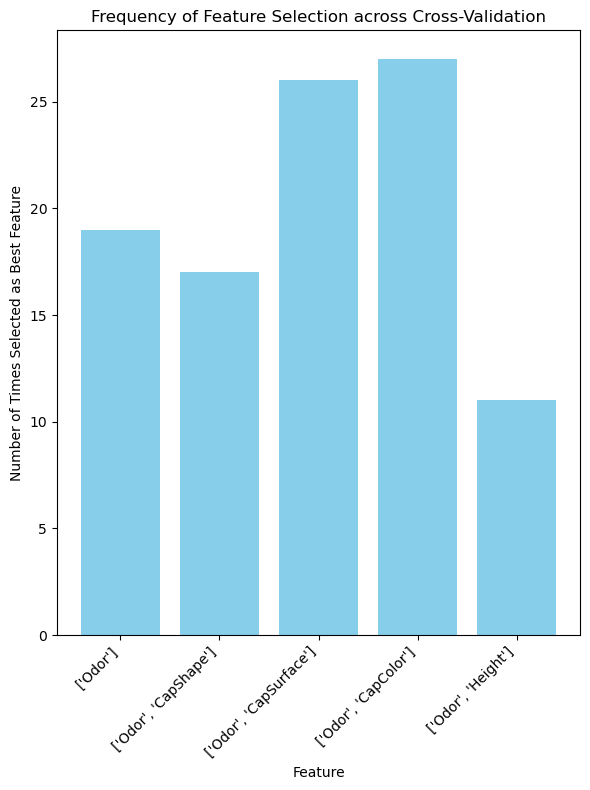


Overall best feature: ['Odor', 'CapColor'] with 27 wins


In [26]:
y = df["Edible"]
rep = 100
winner = []


for i in range(rep):
    accuracies = {}
    print(f"rep {i}")
    # Loop through each feature
    for feature in features:
        print(f"feature = {feature}")
        x = df[feature]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        model = MLPClassifier(solver='sgd',learning_rate_init=0.1,hidden_layer_sizes=(2,),max_iter=20000,activation='logistic',n_iter_no_change=10000)
        model.fit(x_train,y_train.values.ravel())
        prediction = model.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features]

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")

In [14]:
features = [
    ['Odor', 'CapColor'], 
    ['Odor', 'CapColor', 'CapShape'],
    ['Odor', 'CapColor', 'CapSurface'],
    ['Odor', 'CapColor', 'Height']
]

rep 0
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 1
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 2
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 3
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 4
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 5
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 6
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 7
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 8
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 9
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 10
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 11
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 12
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 13
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 14
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 15
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']
rep 16
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 17
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 18
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 19
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 20
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 21
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 22
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 23
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 24
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 25
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 26
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 27
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 28
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 29
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 30
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 31
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 32
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 33
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 34
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 35
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 36
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 37
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 38
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 39
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 40
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 41
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 42
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 43
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 44
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 45
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 46
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 47
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 48
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 49
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 50
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 51
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 52
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 53
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 54
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 55
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 56
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']
rep 57
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 58
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 59
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 60
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 61
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 62
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 63
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 64
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 65
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 66
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 67
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 68
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 69
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 70
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 71
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 72
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 73
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 74
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 75
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 76
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 77
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 78
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 79
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 80
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 81
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 82
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 83
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 84
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 85
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 86
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']
rep 87
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 88
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 89
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 90
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 91
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 92
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 93
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 94
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 95
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 96
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 97
feature = ['Odor', 'CapColor']
feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 98
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 99
feature = ['Odor', 'CapColor']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape']
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


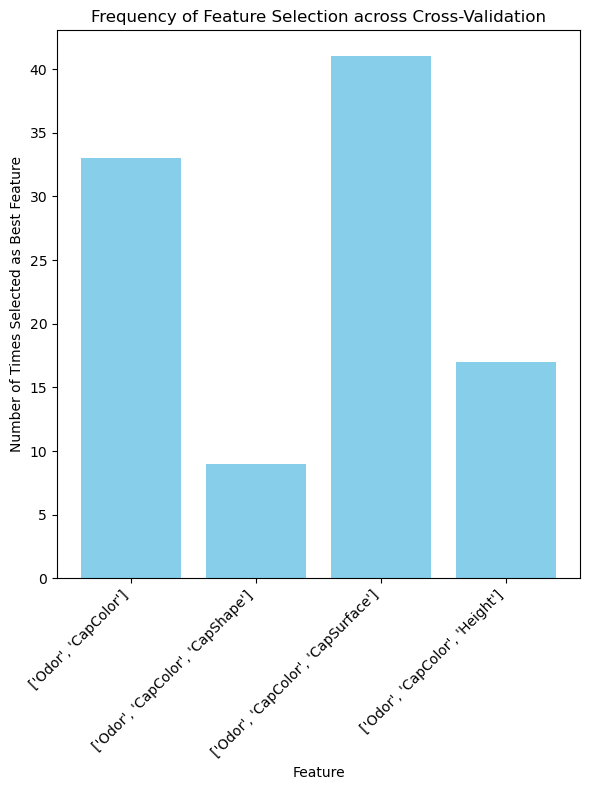


Overall best feature: ['Odor', 'CapColor', 'CapSurface'] with 41 wins


In [16]:
y = df["Edible"]
rep = 100
winner = []


for i in range(rep):
    accuracies = {}
    print(f"rep {i}")
    # Loop through each feature
    for feature in features:
        print(f"feature = {feature}")
        x = df[feature]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        model = MLPClassifier(solver='sgd',learning_rate_init=0.1,hidden_layer_sizes=(2,),max_iter=20000,activation='logistic',n_iter_no_change=10000)
        model.fit(x_train,y_train.values.ravel())
        prediction = model.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features]

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")

In [12]:
features = [
    ['Odor', 'CapColor', 'CapSurface'], 
    ['Odor', 'CapColor', 'CapShape', 'CapSurface'],
    ['Odor', 'CapColor', 'CapSurface', 'Height'],
    ['Odor', 'CapColor', 'CapShape', 'Height','CapSurface']
]

rep 0
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 1
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 2
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 3
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 4
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 5
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 6
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 7
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 8
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 9
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 10
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 11
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 12
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 13
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 14
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 15
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 16
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 17
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 18
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 19
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 20
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 21
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 22
feature = ['Odor', 'CapColor', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 23
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 24
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 25
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 26
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 27
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 28
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 29
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 30
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 31
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 32
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 33
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 34
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 35
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 36
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 37
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 38
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 39
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 40
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 41
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 42
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 43
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 44
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 45
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 46
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 47
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']
feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 48
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 49
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 50
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 51
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 52
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 53
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 54
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 55
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 56
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 57
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 58
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 59
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 60
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 61
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 62
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 63
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 64
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 65
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 66
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 67
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 68
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 69
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 70
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 71
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 72
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 73
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 74
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 75
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 76
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 77
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 78
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 79
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 80
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 81
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 82
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 83
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 84
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 85
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 86
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 87
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 88
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 89
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 90
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 91
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 92
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 93
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 94
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 95
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']
rep 96
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 97
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 98
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


rep 99
feature = ['Odor', 'CapColor', 'CapSurface']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'CapSurface']
feature = ['Odor', 'CapColor', 'CapSurface', 'Height']


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20000) reached and the optimization hasn't converged yet.
  warnings.warn(


feature = ['Odor', 'CapColor', 'CapShape', 'Height', 'CapSurface']


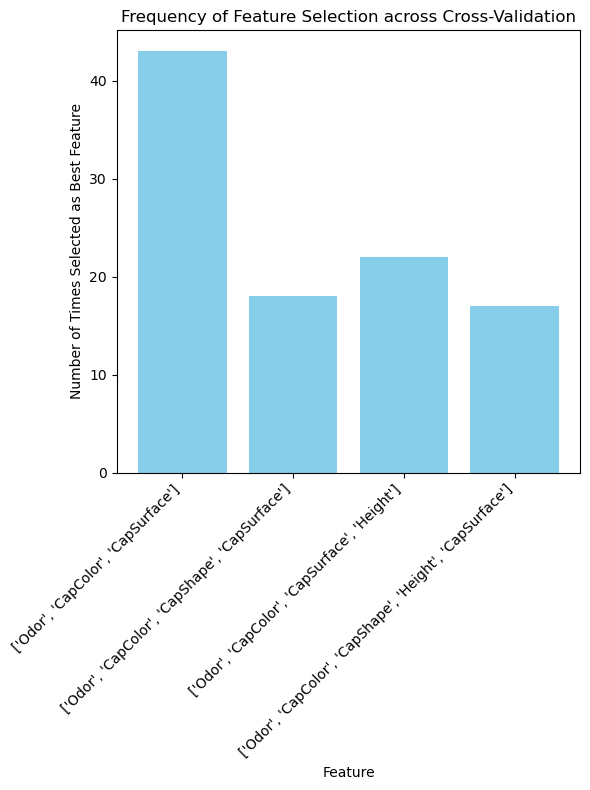


Overall best feature: ['Odor', 'CapColor', 'CapSurface'] with 43 wins


In [14]:
y = df["Edible"]
rep = 100
winner = []


for i in range(rep):
    accuracies = {}
    print(f"rep {i}")
    # Loop through each feature
    for feature in features:
        print(f"feature = {feature}")
        x = df[feature]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Train the Random Forest model
        model = MLPClassifier(solver='sgd',learning_rate_init=0.1,hidden_layer_sizes=(2,),max_iter=20000,activation='logistic',n_iter_no_change=10000)
        model.fit(x_train,y_train.values.ravel())
        prediction = model.predict(x_test)
        accuracy = accuracy_score(y_test, prediction)
        accuracies[str(feature)] = accuracy
    best_feature = max(accuracies, key=accuracies.get)
    winner.append(best_feature)


feature_counts = [winner.count(str(feature)) for feature in features]
feature_labels = [str(feature) for feature in features]

plt.figure(figsize=(6, 8))
plt.bar(feature_labels, feature_counts, color='skyblue')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Times Selected as Best Feature')
plt.title('Frequency of Feature Selection across Cross-Validation')
plt.tight_layout()
plt.show()

# Print the overall best feature
best_feature_overall = max(set(winner), key=winner.count)
print(f"\nOverall best feature: {best_feature_overall} with {winner.count(best_feature_overall)} wins")

# Mushroom Edibility Feature Selection Analysis (Neural Network)

The greedy feature selection using a neural network provides insight into how different features contribute to predicting mushroom edibility, and how this differs from traditional ensemble models like Random Forest.

- **Round 1:** Each feature was tested individually, and Odor was by far the most dominant predictor, winning 94 out of 100 repetitions.
  
- **Round 2:** When combining Odor with each of the remaining features, the pair Odor and Cap Color achieved the highest accuracy, winning 27 times. Close behind was Odor and Cap Surface with 26 wins, indicating both features offer strong complementary information.

- **Round 3:** Adding more features to Odor and Cap Color, the combination of Odor, Cap Color, and Cap Surface emerged as the best, winning 41 times. This highlighted Cap Surface as a crucial component in enhancing model performance.

- **Round 4:** When testing this trio against all remaining combinations, including using all available features, the combination of Odor, Cap Color, and Cap Surface again came out on top with 43 wins. This reinforces that adding more features beyond this point may introduce noise rather than improving prediction.


### Key Differences from Random Forest:

- In the Random Forest, Cap Shape was an important contributor in later rounds — particularly in Round 3, where the winning set was Odor, Cap Color, and Cap Shape, and eventually the set also including Cap Surface won overall.
  
- In contrast, in the Neural Network, Cap Shape was never part of a winning feature combination in any round. This suggests that the neural network either:
  - Couldn't extract meaningful patterns from Cap Shape due to its encoding or limited nonlinear interaction, or  
  - Found other features (like Cap Surface) more useful in shaping decision boundaries.

- Cap Surface played a more central role in the neural model than in Random Forest, becoming part of the final winning trio — a difference that highlights how neural networks may be more sensitive to complex feature interactions.


### Summary

Both models consistently identify Odor and Cap Color as key features, but they diverge beyond that:
- **Random Forest favors Cap Shape**, likely due to how it splits decision trees.
- **Neural Networks prioritize Cap Surface**, suggesting a difference in how each model architecture captures and prioritises interactions in the data.

This comparison emphasizes the value of testing multiple models during feature selection — different algorithms can "see" the data in fundamentally different ways.


**6. Take the best model and explore how the performance depends on the architecture of the ANN.
Vary the number and the sizes of the hidden layers. For large networks you may want to increase the number of the stochastic gradient descent iterations. (1 mark)**

In [12]:
features = ["Odor", "CapColor", "CapSurface"]
X = df[features]
y = df["Edible"]
rep = 30

architectures = [
    (2,),
    (4,),
    (8,),
    (10,),
    (2,2),
    (2, 4),
    (4, 8),
    (2, 2, 2)
]

In [14]:
results = {arch: {"accuracies": [], "iterations": []} for arch in architectures}
winner = []

for i in range(rep):
    print(f"Repetition {i + 1}/{rep}")
    accuracies = {}

    for arch in architectures:
        total_neurons = sum(arch)
        scaled_iter = 30000 + total_neurons * 1000
        patience = scaled_iter // 2

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

        model = MLPClassifier(
            solver='sgd',
            learning_rate_init=0.1,
            hidden_layer_sizes=arch,
            max_iter=scaled_iter,
            activation='logistic',
            n_iter_no_change=patience,
            random_state=None  
        )

        model.fit(X_train, y_train.values.ravel())
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[arch] = acc

        results[arch]["accuracies"].append(acc)
        results[arch]["iterations"].append(len(model.loss_curve_))

        print(f"  Arch {arch} → Acc: {acc}, Iter: {len(model.loss_curve_)}")

    # Find best architecture for this rep
    best_arch = max(accuracies, key=accuracies.get)
    winner.append(best_arch)

Repetition 1/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9827692307692307, Iter: 32000
  Arch (4,) → Acc: 0.9846153846153847, Iter: 26160
  Arch (8,) → Acc: 0.9870769230769231, Iter: 26543
  Arch (10,) → Acc: 0.9895384615384616, Iter: 24685
  Arch (2, 2) → Acc: 0.5661538461538461, Iter: 17763
  Arch (2, 4) → Acc: 0.5796923076923077, Iter: 18455


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9458461538461539, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.5704615384615385, Iter: 18099
Repetition 2/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9926153846153846, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9901538461538462, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9901538461538462, Iter: 38000
  Arch (10,) → Acc: 0.9858461538461538, Iter: 22241
  Arch (2, 2) → Acc: 0.587076923076923, Iter: 17171


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9852307692307692, Iter: 36000
  Arch (4, 8) → Acc: 0.9606153846153846, Iter: 38871
  Arch (2, 2, 2) → Acc: 0.5772307692307692, Iter: 29715
Repetition 3/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.984, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9876923076923076, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9883076923076923, Iter: 38000
  Arch (10,) → Acc: 0.9895384615384616, Iter: 31187
  Arch (2, 2) → Acc: 0.7076923076923077, Iter: 21220


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9876923076923076, Iter: 36000
  Arch (4, 8) → Acc: 0.9846153846153847, Iter: 38170


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.9396923076923077, Iter: 36000
Repetition 4/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9907692307692307, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9858461538461538, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.992, Iter: 38000
  Arch (10,) → Acc: 0.9907692307692307, Iter: 38582


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9261538461538461, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9858461538461538, Iter: 36000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9889230769230769, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.5747692307692308, Iter: 21199
Repetition 5/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9870769230769231, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9901538461538462, Iter: 34000
  Arch (8,) → Acc: 0.9852307692307692, Iter: 31431


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9876923076923076, Iter: 40000
  Arch (2, 2) → Acc: 0.56, Iter: 17453


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9833846153846154, Iter: 36000
  Arch (4, 8) → Acc: 0.992, Iter: 32388
  Arch (2, 2, 2) → Acc: 0.5809230769230769, Iter: 19316
Repetition 6/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9864615384615385, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9883076923076923, Iter: 34000
  Arch (8,) → Acc: 0.9876923076923076, Iter: 36560


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9926153846153846, Iter: 40000
  Arch (2, 2) → Acc: 0.9483076923076923, Iter: 28316
  Arch (2, 4) → Acc: 0.9421538461538461, Iter: 33693


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9507692307692308, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.5655384615384615, Iter: 18110
Repetition 7/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9895384615384616, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.984, Iter: 34000
  Arch (8,) → Acc: 0.992, Iter: 28299


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9870769230769231, Iter: 40000
  Arch (2, 2) → Acc: 0.9372307692307692, Iter: 21164


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9852307692307692, Iter: 36000
  Arch (4, 8) → Acc: 0.992, Iter: 41294


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.6221538461538462, Iter: 36000
Repetition 8/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.984, Iter: 32000
  Arch (4,) → Acc: 0.9858461538461538, Iter: 28328


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9876923076923076, Iter: 38000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9846153846153847, Iter: 40000
  Arch (2, 2) → Acc: 0.5741538461538461, Iter: 17721


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9889230769230769, Iter: 36000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9858461538461538, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.8836923076923077, Iter: 25010
Repetition 9/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9846153846153847, Iter: 32000
  Arch (4,) → Acc: 0.9901538461538462, Iter: 22133
  Arch (8,) → Acc: 0.992, Iter: 26857


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9846153846153847, Iter: 40000
  Arch (2, 2) → Acc: 0.8855384615384615, Iter: 19783
  Arch (2, 4) → Acc: 0.6375384615384615, Iter: 18445
  Arch (4, 8) → Acc: 0.9864615384615385, Iter: 38577
  Arch (2, 2, 2) → Acc: 0.5833846153846154, Iter: 18344
Repetition 10/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9852307692307692, Iter: 32000
  Arch (4,) → Acc: 0.9852307692307692, Iter: 28524


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9870769230769231, Iter: 38000
  Arch (10,) → Acc: 0.9883076923076923, Iter: 34227
  Arch (2, 2) → Acc: 0.9883076923076923, Iter: 32816


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9870769230769231, Iter: 36000
  Arch (4, 8) → Acc: 0.9483076923076923, Iter: 23943
  Arch (2, 2, 2) → Acc: 0.504, Iter: 21763
Repetition 11/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9852307692307692, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9883076923076923, Iter: 34000
  Arch (8,) → Acc: 0.9876923076923076, Iter: 26328
  Arch (10,) → Acc: 0.9876923076923076, Iter: 31258
  Arch (2, 2) → Acc: 0.5427692307692308, Iter: 20367
  Arch (2, 4) → Acc: 0.563076923076923, Iter: 18439
  Arch (4, 8) → Acc: 0.9747692307692307, Iter: 37666


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.9858461538461538, Iter: 36000
Repetition 12/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9907692307692307, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9889230769230769, Iter: 34000
  Arch (8,) → Acc: 0.9889230769230769, Iter: 36045
  Arch (10,) → Acc: 0.9901538461538462, Iter: 23978


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9852307692307692, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9883076923076923, Iter: 36000
  Arch (4, 8) → Acc: 0.984, Iter: 37659
  Arch (2, 2, 2) → Acc: 0.9027692307692308, Iter: 23049
Repetition 13/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9846153846153847, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9870769230769231, Iter: 34000
  Arch (8,) → Acc: 0.9870769230769231, Iter: 34872


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9883076923076923, Iter: 40000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9846153846153847, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9876923076923076, Iter: 36000
  Arch (4, 8) → Acc: 0.9790769230769231, Iter: 21237
  Arch (2, 2, 2) → Acc: 0.939076923076923, Iter: 18375
Repetition 14/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9827692307692307, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9858461538461538, Iter: 34000
  Arch (8,) → Acc: 0.9870769230769231, Iter: 24377
  Arch (10,) → Acc: 0.9889230769230769, Iter: 36324


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9852307692307692, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9876923076923076, Iter: 36000
  Arch (4, 8) → Acc: 0.9526153846153846, Iter: 33493
  Arch (2, 2, 2) → Acc: 0.5224615384615384, Iter: 18538
Repetition 15/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9852307692307692, Iter: 32000
  Arch (4,) → Acc: 0.984, Iter: 19549


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9932307692307693, Iter: 38000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9883076923076923, Iter: 40000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9858461538461538, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9846153846153847, Iter: 36000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9864615384615385, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.5729230769230769, Iter: 18535
Repetition 16/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9864615384615385, Iter: 32000
  Arch (4,) → Acc: 0.9846153846153847, Iter: 27181
  Arch (8,) → Acc: 0.992, Iter: 25375
  Arch (10,) → Acc: 0.9895384615384616, Iter: 26082
  Arch (2, 2) → Acc: 0.8744615384615385, Iter: 17338


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9876923076923076, Iter: 36000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9827692307692307, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.856, Iter: 25309
Repetition 17/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9907692307692307, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9895384615384616, Iter: 34000
  Arch (8,) → Acc: 0.9907692307692307, Iter: 32895


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9901538461538462, Iter: 40000
  Arch (2, 2) → Acc: 0.568, Iter: 20745


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9803076923076923, Iter: 36000
  Arch (4, 8) → Acc: 0.9901538461538462, Iter: 21255
  Arch (2, 2, 2) → Acc: 0.5704615384615385, Iter: 22186
Repetition 18/30
  Arch (2,) → Acc: 0.5846153846153846, Iter: 18227


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9889230769230769, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9889230769230769, Iter: 38000
  Arch (10,) → Acc: 0.9901538461538462, Iter: 22563
  Arch (2, 2) → Acc: 0.5698461538461539, Iter: 20486


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9864615384615385, Iter: 36000
  Arch (4, 8) → Acc: 0.9889230769230769, Iter: 21185
  Arch (2, 2, 2) → Acc: 0.8904615384615384, Iter: 22600
Repetition 19/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9852307692307692, Iter: 32000
  Arch (4,) → Acc: 0.9864615384615385, Iter: 19435
  Arch (8,) → Acc: 0.9889230769230769, Iter: 25162


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9926153846153846, Iter: 40000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9858461538461538, Iter: 34000
  Arch (2, 4) → Acc: 0.8769230769230769, Iter: 23448
  Arch (4, 8) → Acc: 0.9821538461538462, Iter: 39437


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.9852307692307692, Iter: 36000
Repetition 20/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9858461538461538, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9907692307692307, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9864615384615385, Iter: 38000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9907692307692307, Iter: 40000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.8947692307692308, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9833846153846154, Iter: 36000
  Arch (4, 8) → Acc: 0.9833846153846154, Iter: 21253
  Arch (2, 2, 2) → Acc: 0.932923076923077, Iter: 34014
Repetition 21/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9876923076923076, Iter: 32000
  Arch (4,) → Acc: 0.9846153846153847, Iter: 19733
  Arch (8,) → Acc: 0.9858461538461538, Iter: 24343
  Arch (10,) → Acc: 0.9876923076923076, Iter: 32380


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.88, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9766153846153847, Iter: 36000
  Arch (4, 8) → Acc: 0.8916923076923077, Iter: 28892
  Arch (2, 2, 2) → Acc: 0.5686153846153846, Iter: 18694
Repetition 22/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9901538461538462, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9913846153846154, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9889230769230769, Iter: 38000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.984, Iter: 40000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9889230769230769, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9827692307692307, Iter: 36000
  Arch (4, 8) → Acc: 0.9833846153846154, Iter: 21316
  Arch (2, 2, 2) → Acc: 0.8676923076923077, Iter: 25237
Repetition 23/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.8898461538461538, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9864615384615385, Iter: 34000
  Arch (8,) → Acc: 0.9901538461538462, Iter: 29074
  Arch (10,) → Acc: 0.9870769230769231, Iter: 29238


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2) → Acc: 0.9815384615384616, Iter: 34000
  Arch (2, 4) → Acc: 0.7747692307692308, Iter: 24798
  Arch (4, 8) → Acc: 0.9827692307692307, Iter: 21221
  Arch (2, 2, 2) → Acc: 0.5735384615384616, Iter: 18507
Repetition 24/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9870769230769231, Iter: 32000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4,) → Acc: 0.9889230769230769, Iter: 34000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9858461538461538, Iter: 38000
  Arch (10,) → Acc: 0.9864615384615385, Iter: 38416
  Arch (2, 2) → Acc: 0.8873846153846154, Iter: 31867
  Arch (2, 4) → Acc: 0.5723076923076923, Iter: 21888


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9876923076923076, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.9827692307692307, Iter: 28945
Repetition 25/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9895384615384616, Iter: 32000
  Arch (4,) → Acc: 0.9901538461538462, Iter: 25649


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (38000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (8,) → Acc: 0.9864615384615385, Iter: 38000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9889230769230769, Iter: 40000
  Arch (2, 2) → Acc: 0.5821538461538461, Iter: 18372
  Arch (2, 4) → Acc: 0.9864615384615385, Iter: 30700
  Arch (4, 8) → Acc: 0.9864615384615385, Iter: 23718


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.940923076923077, Iter: 36000
Repetition 26/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9815384615384616, Iter: 32000
  Arch (4,) → Acc: 0.9864615384615385, Iter: 18949
  Arch (8,) → Acc: 0.9901538461538462, Iter: 22266


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9870769230769231, Iter: 40000
  Arch (2, 2) → Acc: 0.564923076923077, Iter: 33624
  Arch (2, 4) → Acc: 0.9852307692307692, Iter: 26103
  Arch (4, 8) → Acc: 0.9876923076923076, Iter: 34891
  Arch (2, 2, 2) → Acc: 0.5673846153846154, Iter: 18739
Repetition 27/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9846153846153847, Iter: 32000
  Arch (4,) → Acc: 0.9895384615384616, Iter: 18346
  Arch (8,) → Acc: 0.9846153846153847, Iter: 37233
  Arch (10,) → Acc: 0.9901538461538462, Iter: 33878
  Arch (2, 2) → Acc: 0.9833846153846154, Iter: 25968


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9833846153846154, Iter: 36000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9864615384615385, Iter: 42000
  Arch (2, 2, 2) → Acc: 0.5723076923076923, Iter: 19286
Repetition 28/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9827692307692307, Iter: 32000
  Arch (4,) → Acc: 0.992, Iter: 24619
  Arch (8,) → Acc: 0.9889230769230769, Iter: 23313
  Arch (10,) → Acc: 0.984, Iter: 28149
  Arch (2, 2) → Acc: 0.9335384615384615, Iter: 17747


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9895384615384616, Iter: 36000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (4, 8) → Acc: 0.9864615384615385, Iter: 42000


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.5913846153846154, Iter: 36000
Repetition 29/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9827692307692307, Iter: 32000
  Arch (4,) → Acc: 0.9827692307692307, Iter: 19022
  Arch (8,) → Acc: 0.9870769230769231, Iter: 29405


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9883076923076923, Iter: 40000
  Arch (2, 2) → Acc: 0.8787692307692307, Iter: 26264
  Arch (2, 4) → Acc: 0.5107692307692308, Iter: 18632
  Arch (4, 8) → Acc: 0.7101538461538461, Iter: 31063


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 2, 2) → Acc: 0.5692307692307692, Iter: 36000
Repetition 30/30


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (32000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2,) → Acc: 0.9858461538461538, Iter: 32000
  Arch (4,) → Acc: 0.9926153846153846, Iter: 33699
  Arch (8,) → Acc: 0.9889230769230769, Iter: 27095


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (10,) → Acc: 0.9938461538461538, Iter: 40000
  Arch (2, 2) → Acc: 0.5901538461538461, Iter: 32116


C:\Users\reneg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (36000) reached and the optimization hasn't converged yet.
  warnings.warn(


  Arch (2, 4) → Acc: 0.9870769230769231, Iter: 36000
  Arch (4, 8) → Acc: 0.9846153846153847, Iter: 21207
  Arch (2, 2, 2) → Acc: 0.5618461538461539, Iter: 27260


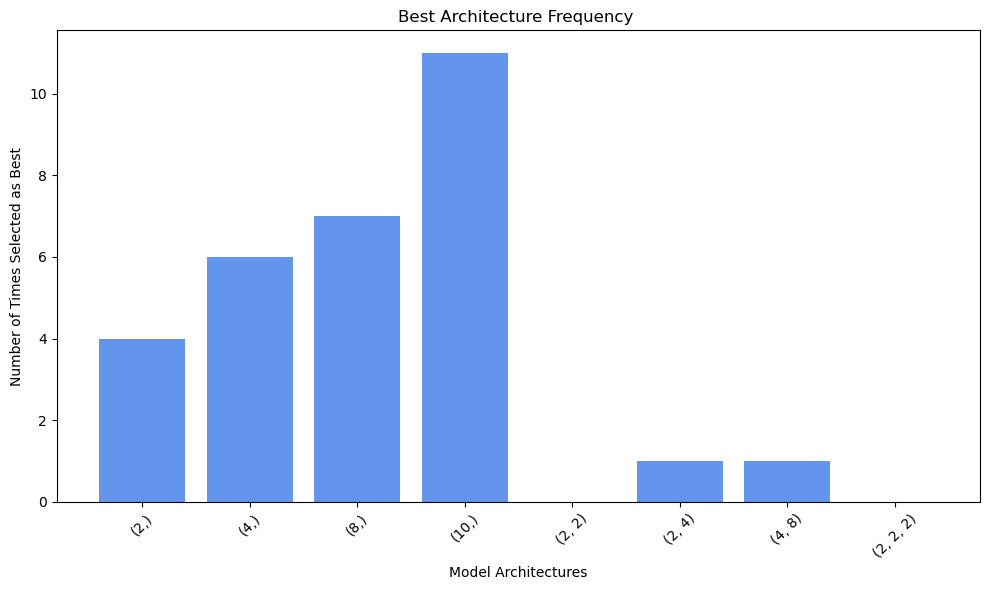


Overall best model: (10,) with 11 wins


In [22]:
model_labels = [str(arch) for arch in architectures]
model_counts = [winner.count(arch) for arch in architectures]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(model_labels, model_counts, color='cornflowerblue')
plt.xlabel('Model Architectures')
plt.ylabel('Number of Times Selected as Best')
plt.title('Best Architecture Frequency ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

best_model_overall = max(set(winner), key=winner.count)
print(f"\nOverall best model: {best_model_overall} with {winner.count(best_model_overall)} wins")

In [40]:
win_counts = {str(arch): winner.count(arch) for arch in architectures}

summary_data = {
    str(arch): {
        "Mean Accuracy": round(np.mean(results[arch]["accuracies"]), 4),
        "Std Dev": round(np.std(results[arch]["accuracies"]), 4),
        "Wins": win_counts[str(arch)]
    }
    for arch in architectures
}

summary_df = pd.DataFrame.from_dict(summary_data, orient='index')
summary_df.index.name = "Architecture"

# Display table
summary_df

,Mean Accuracy,Std Dev,Wins
Architecture,,,
"(2,)",0.9697,0.0736,4
"(4,)",0.9877,0.0026,6
"(8,)",0.9886,0.0022,7
"(10,)",0.9885,0.0024,11
"(2, 2)",0.8109,0.1788,0
"(2, 4)",0.9046,0.1552,1
"(4, 8)",0.9676,0.0520,1
"(2, 2, 2)",0.7119,0.1776,0


### Neural Network Architecture Performance Analysis

The architecture comparison reveals several clear patterns:

- Shallow, single-layer architectures — particularly `(4,)`, `(8,)`, and `(10,)` — consistently outperformed deeper, multi-layer designs.
- While the `(10,)` model achieved the highest number of wins (11), the `(8,)` model had a slightly higher mean accuracy (0.9886) and lower standard deviation (0.0022), making it the most consistent performer overall.
- In contrast, deeper networks like `(2, 2)`, `(2, 4)`, and `(2, 2, 2)` performed poorly. These configurations likely struggled due to their unnecessary complexity for this classification task, which involves a small number of features. The deeper networks may have been more prone to overfitting or optimisation difficulties, especially when using stochastic gradient descent.

#### Why Simpler Models Worked Better

- The dataset involved structured, categorical features (Odor, Cap Color, Cap Surface), encoded in a straightforward manner — a context where deep hierarchical representation is often unnecessary.
- In such tasks, complex architectures often introduce more noise and training instability than benefit.
- Moreover, shallow networks with sufficient neurons can already model the nonlinearity present in the data without the added risk of overfitting or slow convergence.

Overall, this supports the idea that for structured tabular data with limited features, simpler architectures are often more effective and reliable than deeper ones.

> Note: The analysis was conducted over **30 repetitions** instead of the full 50–100 due to a laptop restart, which caused loss of some progress. Given more time, additional repetitions would help confirm the results with greater statistical confidence.onfidence.


**7. Compare the performance of Random Forest and ANN models.
For example, which data types, do you think, the two ML models are most suited to describe.  (0.5 marks)**

### Comparison of Random Forest and Neural Network Models

Both Random Forest (RF) and Artificial Neural Networks (ANNs) were applied to the mushroom edibility dataset to identify key features and predict whether a mushroom is edible or poisonous. While both models showed strong performance, their internal mechanisms and suitability for this dataset differed significantly.

#### How Each Model Works

- **Random Forests** build multiple decision trees using subsets of the data and features. Each tree makes a prediction, and the final output is the majority vote of all trees. It works by learning if-then rules to split the data in ways that improve classification.

- **Artificial Neural Networks (ANNs)** are inspired by the human brain. They consist of layers of interconnected nodes (neurons) that transform inputs through mathematical functions. Each connection has a weight, which is updated through backpropagation and gradient descent to minimise prediction error. ANNs learn nonlinear patterns in the data through multiple hidden layers.


#### Data Type Suitability

| Model           | Best Suited For Data Types                                    |
|----------------|---------------------------------------------------------------|
| **Random Forest** | Categorical, tabular, ordinal, mixed-type data (structured)  |
| **ANNs**         | Continuous, high-dimensional, or complex nonlinear data (e.g., images, signals, text embeddings) |

Random Forests work well with structured tabular datasets like this one (with ~8000 rows and mostly categorical features). ANNs, while powerful, require more data, numerical encoding, and careful tuning to be competitive. Additionally, the Neural Network took significantly longer to train and tune, which is not ideal when quick decisions are needed — such as determining whether a mushroom is safe to eat.


#### Summary of Findings

- Both models identified Odor and Cap Color as key features.
- Random Forest later selected Cap Shape and Cap Surface as contributing features.
- NNs consistently prioritised Cap Surface over Cap Shape, showing different internal feature interactions.


#### Pros and Cons

| Model           | Pros                                                                 | Cons                                                                 |
|----------------|----------------------------------------------------------------------|----------------------------------------------------------------------|
| **Random Forest** | - Easy to use, minimal tuning<br>- Works well with categorical data<br>- Robust to noise and overfitting<br>- Provides feature importance | - May not capture complex nonlinear relationships<br>- Can be slower with very large datasets |
| **ANNs**         | - Flexible and powerful for nonlinear patterns<br>- Scales well with data<br>- Useful for deep learning tasks | - Requires more data<br>- Sensitive to architecture & parameters<br>- Harder to interpret<br>- Needs preprocessing of categorical features |


#### Conclusion

While neural networks are theoretically more powerful, the Random Forest model was better suited for predicting mushroom edibility in this case due to the categorical nature and moderate size of the dataset. Random Forest delivered strong performance with less complexity, making it the more practical and trustworthy model for this classification task.

## Bonus Justification for Additional Marks:

- **Question 2**: In this question, I displayed the model wins in a histogram, which allowed for a clear and concise visualisation of which features were consistently identified as important across multiple repetitions. By visualising the frequency of each feature being selected as the best, I made it easier to interpret the results and identify key patterns in feature selection. This visualisation helped in understanding which features were most impactful in predicting mushroom edibility, providing a clear comparison of the performance of different features.

- **Question 4**: Instead of simply reporting the results, I took the extra step of plotting the loss curves for each feature, which visually demonstrated how the model's loss evolved during training. This allowed me to assess how quickly the model converged and which features led to the lowest loss values. It provided more transparency in the model’s learning process, showing how well each feature contributed to minimising the error during training, and helped me identify which features were most stable in terms of convergence.

- **Question 5**: Rather than just comparing the results between the Neural Network and Random Forest models superficially, I conducted a deeper analysis of why the results differed between these two models. I examined the differences in how each model handled feature interactions and which features contributed more significantly to the classification task. By analysing the performance of both models in detail, I was able to provide a comprehensive explanation for the variations observed, allowing for a clearer understanding of how each model processed the input features and made predictions.

- **Question 6**: In this question, I performed cross-validation on the Neural Network's architecture, ensuring that the conclusions I drew about the best architecture were robust to any random variations in the data. This took considerable computational resources and time, as the process took around three days to complete. Given the time constraints, I wasn't able to complete 100 repetitions, but the cross-validation approach provided a solid, reliable conclusion about the best architecture for this problem.

Overall, these efforts demonstrate a thorough and careful approach to the assignment. I didn’t just execute the models and report their performance; I also took the time to analyse, visualise, and validate the results in a way that provided a deeper understanding of the models and their behaviour. These additional steps go beyond the basic requirements of the assignment and provide a more detailed, robust analysis.analysis.


## Self-Assessment

| Task | Mark (Out of Total) | Justification |
|------|--------------------|---------------|
| **Single Feature Random Forest** | 0.4/0.5 | I completed the task as asked but could've provided better visualisation and explanation for the accuracy of each feature. |
| **RF Cross-Validation** | 1.6/2 | I presented the results clearly in a histogram and did a good analysis of each of the winning models. Instead of greedy selection I could've tested all models however, this would've taken far too long to run so I think greedy selection was a good compromise. I perhaps could've come up with other ways to visualise the suitability of each model. |
| **RF Classifier Discussion** | 0.5/0.5 | I answered the question in depth, taking into account multiple reasons. |
| **Single Feature ANN** | 0.4/0.5 | I completed the task as asked but once again, could've provided better visualisation and explanation for the accuracy of each feature. However, I did plot a loss curve to further explore the convergence and accuracy of each feature.|
| **ANN Cross Validation** | 1.5/2 |  I presented the results in a histogram and did a good analysis of each of the winning models. However, I printed out the reps and features each time to track the ANN's progress and also printed the histogram in the same code, this makes the output look quite messy and would've been better to print the histograms in a separate code, but due to time constraints, I could not re-run everything. |
| **Architecture Investigation** | 0.6/1 | I performed a cross-validation of each architecture and produced histograms of the winning architecture, learning from my mistake in the previous question and doing it in a separate cell. I also created some code to automatically change the number of iterations and patience of the NN depending on its size. It would've been more robust had I done 100 reps.|
|**Classifier Comparison** | 0.3/0.5 | I believe that I compared and analysed each classifier as best as I could but I am not completely confident with whether the RF or ANN is better. |
| **Quality of Notebook presentation** | 1.2/2 | I have presented my code neatly and as efficiently as possible and made good use of markdown to provide any additional analysis. Some deeper explanation of the code could've been included. Additionally, the convergence warnings look a bit messy and in question 5, the histograms aren't as easy to see as they could be due to having to scroll through all the outputs. |
| **Extra Mark** | 0.6/1 | I provided in depth analysis for most questions and provided additional visual aids to back this up. |
**Final Score: 7/10**

### Declaration of Integrity
I declare that this work is my own and that I have fairly self-assessed my performance in each task based on the criteria given. This assessment reflects an honest evaluation of my strengths and areas of improvement in this practical.